# Implementing a Neural Network
In this exercise we will develop a neural network with fully-connected layers to perform classification, and test it out on the CIFAR-10 dataset.

In [96]:
from __future__ import print_function
# A bit of setup

import numpy as np
import matplotlib.pyplot as plt

from cs231n.classifiers.neural_net import TwoLayerNet


%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


We will use the class `TwoLayerNet` in the file `cs231n/classifiers/neural_net.py` to represent instances of our network. The network parameters are stored in the instance variable `self.params` where keys are string parameter names and values are numpy arrays. Below, we initialize toy data and a toy model that we will use to develop your implementation.

In [40]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    print(X)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

[[ 16.24345364  -6.11756414  -5.28171752 -10.72968622]
 [  8.65407629 -23.01538697  17.44811764  -7.61206901]
 [  3.19039096  -2.49370375  14.62107937 -20.60140709]
 [ -3.22417204  -3.84054355  11.33769442 -10.99891267]
 [ -1.72428208  -8.77858418   0.42213747   5.82815214]]


# Forward pass: compute scores
Open the file `cs231n/classifiers/neural_net.py` and look at the method `TwoLayerNet.loss`. This function is very similar to the loss functions you have written for the SVM and Softmax exercises: It takes the data and weights and computes the class scores, the loss, and the gradients on the parameters. 

Implement the first part of the forward pass which uses the weights and biases to compute the scores for all inputs.

In [41]:
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()

# The difference should be very small. We get < 1e-7
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
3.6802720925453725e-08


# Forward pass: compute loss
In the same function, implement the second part that computes the data and regularizaion loss.

In [42]:
loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.30378789133

# should be very small, we get < 1e-12
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

Difference between your loss and correct loss:
1.7985612998927536e-13


# Backward pass
Implement the rest of the function. This will compute the gradient of the loss with respect to the variables `W1`, `b1`, `W2`, and `b2`. Now that you (hopefully!) have a correctly implemented forward pass, you can debug your backward pass using a numeric gradient check:

In [43]:
from cs231n.gradient_check import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

loss, grads = net.loss(X, y, reg=0.05)

# these should all be less than 1e-8 or so
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

W2 max relative error: 3.440708e-09
b2 max relative error: 4.447646e-11
W1 max relative error: 3.561318e-09
b1 max relative error: 2.738421e-09


# Train the network
To train the network we will use stochastic gradient descent (SGD), similar to the SVM and Softmax classifiers. Look at the function `TwoLayerNet.train` and fill in the missing sections to implement the training procedure. This should be very similar to the training procedure you used for the SVM and Softmax classifiers. You will also have to implement `TwoLayerNet.predict`, as the training process periodically performs prediction to keep track of accuracy over time while the network trains.

Once you have implemented the method, run the code below to train a two-layer network on toy data. You should achieve a training loss less than 0.2.

5
2
2.5
Final training loss:  0.18202539054699668


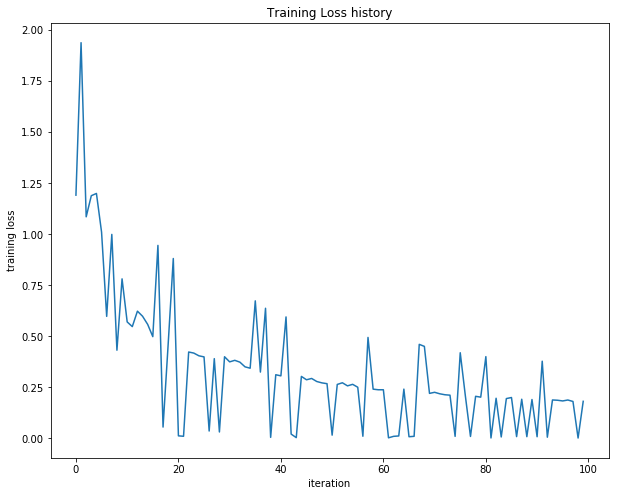

In [57]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# Load the data
Now that you have implemented a two-layer network that passes gradient checks and works on toy data, it's time to load up our favorite CIFAR-10 data so we can use it to train a classifier on a real dataset.

In [58]:
from cs231n.data_utils import load_CIFAR10

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test


# Cleaning up variables to prevent loading data multiple times (which may cause memory issue)
try:
   del X_train, y_train
   del X_test, y_test
   print('Clear previously loaded data.')
except:
   pass

# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


# Train a network
To train our network we will use SGD. In addition, we will adjust the learning rate with an exponential learning rate schedule as optimization proceeds; after each epoch, we will reduce the learning rate by multiplying it by a decay rate.

In [68]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=10000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.25, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)



49000
200
245.0
iteration 0 / 10000: loss 2.302959
iteration 100 / 10000: loss 2.302533
iteration 200 / 10000: loss 2.300388
iteration 300 / 10000: loss 2.265545
iteration 400 / 10000: loss 2.216380
iteration 500 / 10000: loss 2.107963
iteration 600 / 10000: loss 2.088572
iteration 700 / 10000: loss 2.048051
iteration 800 / 10000: loss 2.013985
iteration 900 / 10000: loss 1.985474
iteration 1000 / 10000: loss 2.035504
iteration 1100 / 10000: loss 1.937332
iteration 1200 / 10000: loss 1.856173
iteration 1300 / 10000: loss 1.907034
iteration 1400 / 10000: loss 1.907312
iteration 1500 / 10000: loss 1.847656
iteration 1600 / 10000: loss 1.861860
iteration 1700 / 10000: loss 1.872477
iteration 1800 / 10000: loss 1.804665
iteration 1900 / 10000: loss 1.814218
iteration 2000 / 10000: loss 1.692074
iteration 2100 / 10000: loss 1.727502
iteration 2200 / 10000: loss 1.826256
iteration 2300 / 10000: loss 1.838041
iteration 2400 / 10000: loss 1.732397
iteration 2500 / 10000: loss 1.676851
iteratio

# Debug the training
With the default parameters we provided above, you should get a validation accuracy of about 0.29 on the validation set. This isn't very good.

One strategy for getting insight into what's wrong is to plot the loss function and the accuracies on the training and validation sets during optimization.

Another strategy is to visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized.

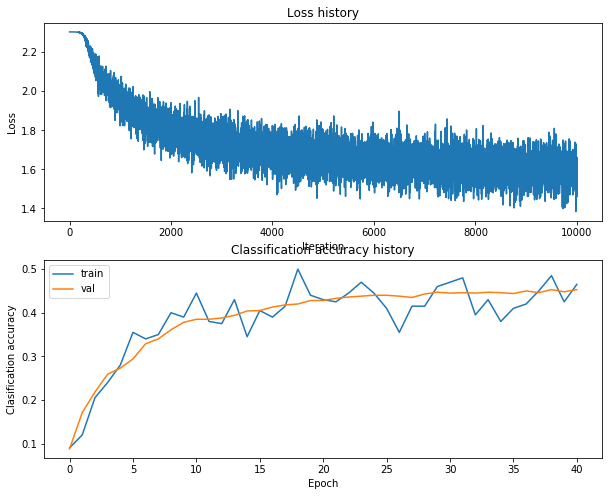

In [69]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.legend()
plt.show()

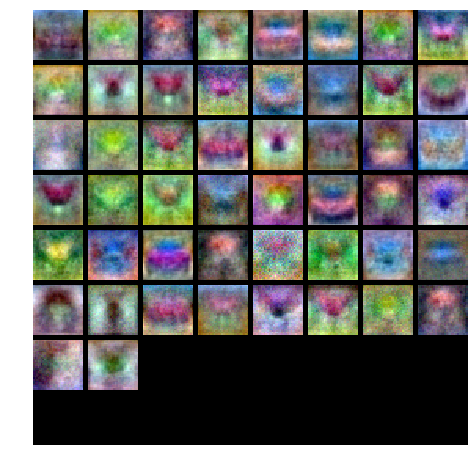

In [70]:
from cs231n.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(net)

# Tune your hyperparameters

**What's wrong?**. Looking at the visualizations above, we see that the loss is decreasing more or less linearly, which seems to suggest that the learning rate may be too low. Moreover, there is no gap between the training and validation accuracy, suggesting that the model we used has low capacity, and that we should increase its size. On the other hand, with a very large model we would expect to see more overfitting, which would manifest itself as a very large gap between the training and validation accuracy.

**Tuning**. Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks, so we want you to get a lot of practice. Below, you should experiment with different values of the various hyperparameters, including hidden layer size, learning rate, numer of training epochs, and regularization strength. You might also consider tuning the learning rate decay, but you should be able to get good performance using the default value.

**Approximate results**. You should be aim to achieve a classification accuracy of greater than 48% on the validation set. Our best network gets over 52% on the validation set.

**Experiment**: You goal in this exercise is to get as good of a result on CIFAR-10 as you can, with a fully-connected Neural Network. Feel free implement your own techniques (e.g. PCA to reduce dimensionality, or adding dropout, or adding features to the solver, etc.).

In [90]:
best_net = None # store the best model into this 

#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_net.                                                            #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# Tweaking hyperparameters by hand can be fun, but you might find it useful to  #
# write code to sweep through possible combinations of hyperparameters          #
# automatically like we did on the previous exercises.                          #
#################################################################################
# Your code
input_size = 32 * 32 * 3
num_classes = 10
hidden_size= 50

learning_rates = [1e-4,1e-5,1e-6]
iteration = [1000,5000,10000]
regularization= [0.1, 0.25, 0.4]
hdsize = [30,50, 60]
best_val = -1
net = None
results = {}
i = 0 

for lr in learning_rates:
    for re in regularization:
        for hs in hdsize:
            print("No. of Training: {}".format(i))
            net = TwoLayerNet(input_size, hs, num_classes)
            stats = net.train(X_train, y_train, X_val, y_val,
                              num_iters=10000, batch_size=400,
                              learning_rate=lr, 
                              learning_rate_decay=0.95,reg=re,verbose=True)
            val_acc = (net.predict(X_val) == y_val).mean()
            print('Validation accuracy: ', val_acc)
            results[(lr,re,hs)] = (val_acc)
            if best_val < val_acc:
                best_val = val_acc
                best_net = net
            
            i += 1

        
for lr, re, hs in sorted(results):
    val_accuracy = results[(lr, re, hs)]
    print('lr %e re %e hs %e val accuracy: %f' % (
                lr, re, hs, val_accuracy))
print('best validation accuracy achieved during cross-validation: %f' % best_val)        
#################################################################################
#                               END OF YOUR CODE                                #
#################################################################################

No. of Training: 0
49000
400
122.5
iteration 0 / 10000: loss 2.302679
iteration 100 / 10000: loss 2.302346
iteration 200 / 10000: loss 2.299190
iteration 300 / 10000: loss 2.280627
iteration 400 / 10000: loss 2.214083
iteration 500 / 10000: loss 2.163130
iteration 600 / 10000: loss 2.090710
iteration 700 / 10000: loss 2.084907
iteration 800 / 10000: loss 2.029496
iteration 900 / 10000: loss 2.035474
iteration 1000 / 10000: loss 1.955577
iteration 1100 / 10000: loss 1.999208
iteration 1200 / 10000: loss 1.884275
iteration 1300 / 10000: loss 1.885615
iteration 1400 / 10000: loss 1.854779
iteration 1500 / 10000: loss 1.813496
iteration 1600 / 10000: loss 1.854288
iteration 1700 / 10000: loss 1.805827
iteration 1800 / 10000: loss 1.824865
iteration 1900 / 10000: loss 1.769324
iteration 2000 / 10000: loss 1.834396
iteration 2100 / 10000: loss 1.759923
iteration 2200 / 10000: loss 1.735252
iteration 2300 / 10000: loss 1.810324
iteration 2400 / 10000: loss 1.866010
iteration 2500 / 10000: los

iteration 1300 / 10000: loss 1.817472
iteration 1400 / 10000: loss 1.914903
iteration 1500 / 10000: loss 1.809734
iteration 1600 / 10000: loss 1.885616
iteration 1700 / 10000: loss 1.813939
iteration 1800 / 10000: loss 1.816318
iteration 1900 / 10000: loss 1.800032
iteration 2000 / 10000: loss 1.795126
iteration 2100 / 10000: loss 1.688392
iteration 2200 / 10000: loss 1.753986
iteration 2300 / 10000: loss 1.726516
iteration 2400 / 10000: loss 1.721341
iteration 2500 / 10000: loss 1.715776
iteration 2600 / 10000: loss 1.725008
iteration 2700 / 10000: loss 1.779398
iteration 2800 / 10000: loss 1.666600
iteration 2900 / 10000: loss 1.723608
iteration 3000 / 10000: loss 1.735221
iteration 3100 / 10000: loss 1.748230
iteration 3200 / 10000: loss 1.686884
iteration 3300 / 10000: loss 1.708027
iteration 3400 / 10000: loss 1.687821
iteration 3500 / 10000: loss 1.685598
iteration 3600 / 10000: loss 1.697897
iteration 3700 / 10000: loss 1.760794
iteration 3800 / 10000: loss 1.678595
iteration 39

iteration 2600 / 10000: loss 1.785790
iteration 2700 / 10000: loss 1.730626
iteration 2800 / 10000: loss 1.729422
iteration 2900 / 10000: loss 1.658057
iteration 3000 / 10000: loss 1.702819
iteration 3100 / 10000: loss 1.716282
iteration 3200 / 10000: loss 1.692338
iteration 3300 / 10000: loss 1.753014
iteration 3400 / 10000: loss 1.701073
iteration 3500 / 10000: loss 1.709605
iteration 3600 / 10000: loss 1.672997
iteration 3700 / 10000: loss 1.763087
iteration 3800 / 10000: loss 1.639636
iteration 3900 / 10000: loss 1.694427
iteration 4000 / 10000: loss 1.658470
iteration 4100 / 10000: loss 1.721329
iteration 4200 / 10000: loss 1.681610
iteration 4300 / 10000: loss 1.674030
iteration 4400 / 10000: loss 1.642017
iteration 4500 / 10000: loss 1.660020
iteration 4600 / 10000: loss 1.711457
iteration 4700 / 10000: loss 1.673916
iteration 4800 / 10000: loss 1.576071
iteration 4900 / 10000: loss 1.615608
iteration 5000 / 10000: loss 1.576664
iteration 5100 / 10000: loss 1.659065
iteration 52

iteration 3900 / 10000: loss 1.714596
iteration 4000 / 10000: loss 1.754000
iteration 4100 / 10000: loss 1.665325
iteration 4200 / 10000: loss 1.755905
iteration 4300 / 10000: loss 1.691916
iteration 4400 / 10000: loss 1.688508
iteration 4500 / 10000: loss 1.802684
iteration 4600 / 10000: loss 1.708013
iteration 4700 / 10000: loss 1.679759
iteration 4800 / 10000: loss 1.691589
iteration 4900 / 10000: loss 1.722506
iteration 5000 / 10000: loss 1.640540
iteration 5100 / 10000: loss 1.689093
iteration 5200 / 10000: loss 1.654108
iteration 5300 / 10000: loss 1.665346
iteration 5400 / 10000: loss 1.696199
iteration 5500 / 10000: loss 1.707005
iteration 5600 / 10000: loss 1.727194
iteration 5700 / 10000: loss 1.602657
iteration 5800 / 10000: loss 1.671644
iteration 5900 / 10000: loss 1.755279
iteration 6000 / 10000: loss 1.668224
iteration 6100 / 10000: loss 1.677886
iteration 6200 / 10000: loss 1.650513
iteration 6300 / 10000: loss 1.636206
iteration 6400 / 10000: loss 1.631396
iteration 65

iteration 5200 / 10000: loss 1.734757
iteration 5300 / 10000: loss 1.600761
iteration 5400 / 10000: loss 1.719074
iteration 5500 / 10000: loss 1.686331
iteration 5600 / 10000: loss 1.642004
iteration 5700 / 10000: loss 1.555280
iteration 5800 / 10000: loss 1.662474
iteration 5900 / 10000: loss 1.545439
iteration 6000 / 10000: loss 1.643111
iteration 6100 / 10000: loss 1.581414
iteration 6200 / 10000: loss 1.649043
iteration 6300 / 10000: loss 1.672868
iteration 6400 / 10000: loss 1.548732
iteration 6500 / 10000: loss 1.636772
iteration 6600 / 10000: loss 1.694487
iteration 6700 / 10000: loss 1.646224
iteration 6800 / 10000: loss 1.550928
iteration 6900 / 10000: loss 1.616752
iteration 7000 / 10000: loss 1.658290
iteration 7100 / 10000: loss 1.685698
iteration 7200 / 10000: loss 1.672456
iteration 7300 / 10000: loss 1.602594
iteration 7400 / 10000: loss 1.644617
iteration 7500 / 10000: loss 1.695871
iteration 7600 / 10000: loss 1.606675
iteration 7700 / 10000: loss 1.549358
iteration 78

iteration 6500 / 10000: loss 2.195878
iteration 6600 / 10000: loss 2.241334
iteration 6700 / 10000: loss 2.226407
iteration 6800 / 10000: loss 2.208077
iteration 6900 / 10000: loss 2.195107
iteration 7000 / 10000: loss 2.229888
iteration 7100 / 10000: loss 2.204128
iteration 7200 / 10000: loss 2.200525
iteration 7300 / 10000: loss 2.185271
iteration 7400 / 10000: loss 2.196132
iteration 7500 / 10000: loss 2.182596
iteration 7600 / 10000: loss 2.203494
iteration 7700 / 10000: loss 2.209335
iteration 7800 / 10000: loss 2.202487
iteration 7900 / 10000: loss 2.194623
iteration 8000 / 10000: loss 2.184918
iteration 8100 / 10000: loss 2.181997
iteration 8200 / 10000: loss 2.191854
iteration 8300 / 10000: loss 2.209478
iteration 8400 / 10000: loss 2.191512
iteration 8500 / 10000: loss 2.182102
iteration 8600 / 10000: loss 2.145361
iteration 8700 / 10000: loss 2.155909
iteration 8800 / 10000: loss 2.199038
iteration 8900 / 10000: loss 2.161159
iteration 9000 / 10000: loss 2.175586
iteration 91

iteration 7800 / 10000: loss 2.196536
iteration 7900 / 10000: loss 2.208044
iteration 8000 / 10000: loss 2.224741
iteration 8100 / 10000: loss 2.217385
iteration 8200 / 10000: loss 2.168637
iteration 8300 / 10000: loss 2.212138
iteration 8400 / 10000: loss 2.199418
iteration 8500 / 10000: loss 2.209546
iteration 8600 / 10000: loss 2.199655
iteration 8700 / 10000: loss 2.211764
iteration 8800 / 10000: loss 2.222157
iteration 8900 / 10000: loss 2.212125
iteration 9000 / 10000: loss 2.173810
iteration 9100 / 10000: loss 2.190616
iteration 9200 / 10000: loss 2.188344
iteration 9300 / 10000: loss 2.197328
iteration 9400 / 10000: loss 2.178525
iteration 9500 / 10000: loss 2.172667
iteration 9600 / 10000: loss 2.216118
iteration 9700 / 10000: loss 2.164280
iteration 9800 / 10000: loss 2.190432
iteration 9900 / 10000: loss 2.177005
Validation accuracy:  0.194
No. of Training: 13
49000
400
122.5
iteration 0 / 10000: loss 2.302966
iteration 100 / 10000: loss 2.302927
iteration 200 / 10000: loss 

iteration 9100 / 10000: loss 2.191181
iteration 9200 / 10000: loss 2.143759
iteration 9300 / 10000: loss 2.178824
iteration 9400 / 10000: loss 2.199054
iteration 9500 / 10000: loss 2.187950
iteration 9600 / 10000: loss 2.147360
iteration 9700 / 10000: loss 2.179642
iteration 9800 / 10000: loss 2.163453
iteration 9900 / 10000: loss 2.162999
Validation accuracy:  0.206
No. of Training: 15
49000
400
122.5
iteration 0 / 10000: loss 2.302958
iteration 100 / 10000: loss 2.302943
iteration 200 / 10000: loss 2.302946
iteration 300 / 10000: loss 2.302920
iteration 400 / 10000: loss 2.302911
iteration 500 / 10000: loss 2.302907
iteration 600 / 10000: loss 2.302888
iteration 700 / 10000: loss 2.302887
iteration 800 / 10000: loss 2.302869
iteration 900 / 10000: loss 2.302860
iteration 1000 / 10000: loss 2.302822
iteration 1100 / 10000: loss 2.302823
iteration 1200 / 10000: loss 2.302756
iteration 1300 / 10000: loss 2.302696
iteration 1400 / 10000: loss 2.302658
iteration 1500 / 10000: loss 2.30267

iteration 300 / 10000: loss 2.303240
iteration 400 / 10000: loss 2.303177
iteration 500 / 10000: loss 2.303157
iteration 600 / 10000: loss 2.303088
iteration 700 / 10000: loss 2.302962
iteration 800 / 10000: loss 2.302957
iteration 900 / 10000: loss 2.302862
iteration 1000 / 10000: loss 2.302838
iteration 1100 / 10000: loss 2.302685
iteration 1200 / 10000: loss 2.302274
iteration 1300 / 10000: loss 2.302001
iteration 1400 / 10000: loss 2.302187
iteration 1500 / 10000: loss 2.301736
iteration 1600 / 10000: loss 2.301171
iteration 1700 / 10000: loss 2.301158
iteration 1800 / 10000: loss 2.299937
iteration 1900 / 10000: loss 2.300433
iteration 2000 / 10000: loss 2.299285
iteration 2100 / 10000: loss 2.298848
iteration 2200 / 10000: loss 2.299268
iteration 2300 / 10000: loss 2.296308
iteration 2400 / 10000: loss 2.297056
iteration 2500 / 10000: loss 2.295133
iteration 2600 / 10000: loss 2.295068
iteration 2700 / 10000: loss 2.295597
iteration 2800 / 10000: loss 2.290021
iteration 2900 / 10

iteration 1700 / 10000: loss 2.302702
iteration 1800 / 10000: loss 2.302687
iteration 1900 / 10000: loss 2.302680
iteration 2000 / 10000: loss 2.302687
iteration 2100 / 10000: loss 2.302675
iteration 2200 / 10000: loss 2.302695
iteration 2300 / 10000: loss 2.302689
iteration 2400 / 10000: loss 2.302695
iteration 2500 / 10000: loss 2.302678
iteration 2600 / 10000: loss 2.302674
iteration 2700 / 10000: loss 2.302670
iteration 2800 / 10000: loss 2.302676
iteration 2900 / 10000: loss 2.302670
iteration 3000 / 10000: loss 2.302655
iteration 3100 / 10000: loss 2.302671
iteration 3200 / 10000: loss 2.302669
iteration 3300 / 10000: loss 2.302675
iteration 3400 / 10000: loss 2.302666
iteration 3500 / 10000: loss 2.302665
iteration 3600 / 10000: loss 2.302647
iteration 3700 / 10000: loss 2.302651
iteration 3800 / 10000: loss 2.302668
iteration 3900 / 10000: loss 2.302670
iteration 4000 / 10000: loss 2.302667
iteration 4100 / 10000: loss 2.302656
iteration 4200 / 10000: loss 2.302666
iteration 43

iteration 3000 / 10000: loss 2.302796
iteration 3100 / 10000: loss 2.302779
iteration 3200 / 10000: loss 2.302791
iteration 3300 / 10000: loss 2.302798
iteration 3400 / 10000: loss 2.302792
iteration 3500 / 10000: loss 2.302791
iteration 3600 / 10000: loss 2.302792
iteration 3700 / 10000: loss 2.302797
iteration 3800 / 10000: loss 2.302792
iteration 3900 / 10000: loss 2.302788
iteration 4000 / 10000: loss 2.302798
iteration 4100 / 10000: loss 2.302788
iteration 4200 / 10000: loss 2.302794
iteration 4300 / 10000: loss 2.302781
iteration 4400 / 10000: loss 2.302786
iteration 4500 / 10000: loss 2.302779
iteration 4600 / 10000: loss 2.302794
iteration 4700 / 10000: loss 2.302777
iteration 4800 / 10000: loss 2.302780
iteration 4900 / 10000: loss 2.302783
iteration 5000 / 10000: loss 2.302779
iteration 5100 / 10000: loss 2.302783
iteration 5200 / 10000: loss 2.302770
iteration 5300 / 10000: loss 2.302775
iteration 5400 / 10000: loss 2.302783
iteration 5500 / 10000: loss 2.302781
iteration 56

iteration 4300 / 10000: loss 2.302953
iteration 4400 / 10000: loss 2.302946
iteration 4500 / 10000: loss 2.302916
iteration 4600 / 10000: loss 2.302949
iteration 4700 / 10000: loss 2.302948
iteration 4800 / 10000: loss 2.302929
iteration 4900 / 10000: loss 2.302946
iteration 5000 / 10000: loss 2.302922
iteration 5100 / 10000: loss 2.302939
iteration 5200 / 10000: loss 2.302923
iteration 5300 / 10000: loss 2.302952
iteration 5400 / 10000: loss 2.302909
iteration 5500 / 10000: loss 2.302928
iteration 5600 / 10000: loss 2.302914
iteration 5700 / 10000: loss 2.302925
iteration 5800 / 10000: loss 2.302919
iteration 5900 / 10000: loss 2.302919
iteration 6000 / 10000: loss 2.302932
iteration 6100 / 10000: loss 2.302918
iteration 6200 / 10000: loss 2.302901
iteration 6300 / 10000: loss 2.302903
iteration 6400 / 10000: loss 2.302916
iteration 6500 / 10000: loss 2.302916
iteration 6600 / 10000: loss 2.302874
iteration 6700 / 10000: loss 2.302926
iteration 6800 / 10000: loss 2.302907
iteration 69

iteration 5600 / 10000: loss 2.303124
iteration 5700 / 10000: loss 2.303121
iteration 5800 / 10000: loss 2.303125
iteration 5900 / 10000: loss 2.303136
iteration 6000 / 10000: loss 2.303139
iteration 6100 / 10000: loss 2.303132
iteration 6200 / 10000: loss 2.303131
iteration 6300 / 10000: loss 2.303124
iteration 6400 / 10000: loss 2.303131
iteration 6500 / 10000: loss 2.303117
iteration 6600 / 10000: loss 2.303126
iteration 6700 / 10000: loss 2.303140
iteration 6800 / 10000: loss 2.303127
iteration 6900 / 10000: loss 2.303144
iteration 7000 / 10000: loss 2.303124
iteration 7100 / 10000: loss 2.303101
iteration 7200 / 10000: loss 2.303140
iteration 7300 / 10000: loss 2.303128
iteration 7400 / 10000: loss 2.303127
iteration 7500 / 10000: loss 2.303105
iteration 7600 / 10000: loss 2.303119
iteration 7700 / 10000: loss 2.303120
iteration 7800 / 10000: loss 2.303121
iteration 7900 / 10000: loss 2.303119
iteration 8000 / 10000: loss 2.303124
iteration 8100 / 10000: loss 2.303120
iteration 82

In [91]:
for lr, re, hs in sorted(results):
    val_accuracy = results[(lr, re, hs)]
    print('lr %e re %e hs %e val accuracy: %f' % (
                lr, re, hs, val_accuracy))
print('best validation accuracy achieved during cross-validation: %f' % best_val)        

lr 1.000000e-04 re 1.000000e-01 hs 3.000000e+01 val accuracy: 0.437000
lr 1.000000e-04 re 1.000000e-01 hs 5.000000e+01 val accuracy: 0.453000
lr 1.000000e-04 re 1.000000e-01 hs 6.000000e+01 val accuracy: 0.462000
lr 1.000000e-04 re 2.500000e-01 hs 5.000000e+01 val accuracy: 0.467000
best validation accuracy achieved during cross-validation: 0.467000


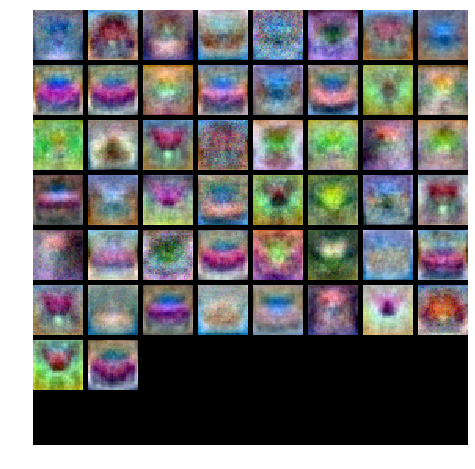

In [92]:
# visualize the weights of the best network
show_net_weights(best_net)

# Run on the test set
When you are done experimenting, you should evaluate your final trained network on the test set; you should get above 48%.

In [95]:
test_acc = (best_net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.436


**Inline Question**

Now that you have trained a Neural Network classifier, you may find that your testing accuracy is much lower than the training accuracy. In what ways can we decrease this gap? Select all that apply.
1. Train on a larger dataset.
2. Add more hidden units.
3. Increase the regularization strength.
4. None of the above.

*Your answer*: 1,3 

*Your explanation: 1,3 can avoid overfitting 2 can make your training achieve overfitting make the model memorize the training easily